In [0]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.2.0
2.3.0-tf


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [0]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [0]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

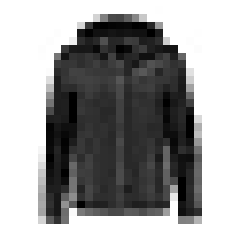

In [0]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [0]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

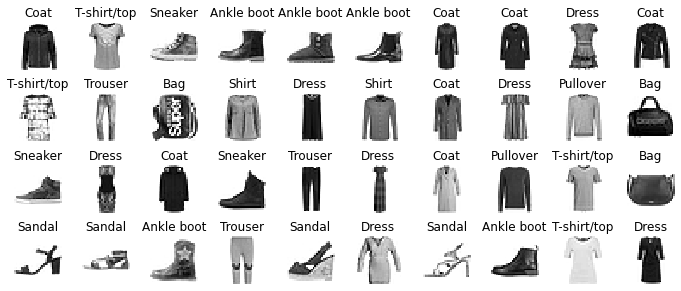

In [0]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras.layers import BatchNormalization
from keras.layers import Flatten

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation='relu', name='dense'),
    keras.layers.Dense(100, activation='relu', name='dense_1'),
    keras.layers.Dense(10, name='dense_2')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])
history_sgd = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32,epochs=10)

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4610 - accuracy: 0.8323 - val_loss: 0.3376 - val_accuracy: 0.8790
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3497 - accuracy: 0.8713 - val_loss: 0.3289 - val_accuracy: 0.8804
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3132 - accuracy: 0.8824 - val_loss: 0.3152 - val_accuracy: 0.8892
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2898 - accuracy: 0.8905 - val_loss: 0.2996 - val_accuracy: 0.8928
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2723 - accuracy: 0.8979 - val_loss: 0.3108 - val_accuracy: 0.8870
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2517 - accuracy: 0.9050 - val_loss: 0.3177 - val_accuracy: 0.8896
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2407 - accuracy: 0.9094 - val_loss: 0.3061 - val_accuracy

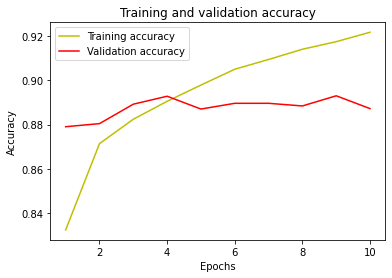

In [0]:
loss = history_sgd.history['accuracy']
val_loss = history_sgd.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
h = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=1)
# history_adam = model.fit(X_train, y_train, validation_data= (X_valid, y_valid),epochs=1)

1719/1719 [==============================] - 5s 3ms/step - loss: 0.3280 - accuracy: 0.8792 - val_loss: 0.3142 - val_accuracy: 0.8806


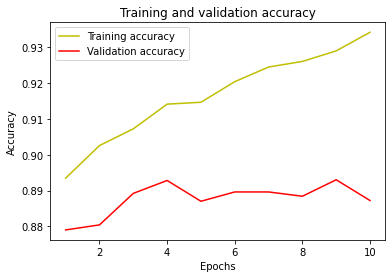

In [0]:
loss = history_adam.history['accuracy']
val_loss = history_sgd.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model.predict(X_test)

array([[5.21759570e-01, 1.93465590e-01, 9.94418561e-03, ...,
        1.32267214e-02, 2.77079903e-02, 4.54090041e-05],
       [5.38995206e-01, 1.80875540e-01, 1.15724858e-02, ...,
        1.31294830e-02, 2.56670173e-02, 4.45425867e-05],
       [5.33779204e-01, 2.05640286e-01, 9.48831625e-03, ...,
        1.20128440e-02, 2.51373481e-02, 3.76159514e-05],
       ...,
       [5.45182705e-01, 1.78704053e-01, 9.59096570e-03, ...,
        1.27074737e-02, 2.64210328e-02, 4.20010438e-05],
       [5.29211700e-01, 2.04160228e-01, 9.83375125e-03, ...,
        1.25159193e-02, 2.57811379e-02, 4.04031125e-05],
       [5.33284366e-01, 1.86859474e-01, 1.00265425e-02, ...,
        1.30236745e-02, 2.70484649e-02, 4.22340854e-05]], dtype=float32)

In [0]:
y_predict = np.argmax(model.predict(X_test), axis=-1)

In [0]:
y_predict

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
sum(y_predict == y_test) / y_test.shape[0]

0.8691

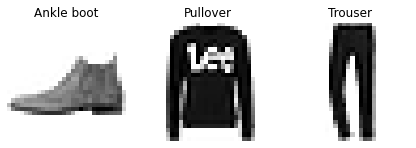

In [0]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_predict[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [0]:
3